<a href="https://colab.research.google.com/github/chandrima91/Programming_first/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import datasets, layers, models



In [ ]:
fashion_mnist= tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

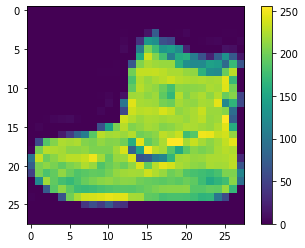

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [ ]:
train_images = train_images/train_images.max()
test_images = test_images/test_images.max()
train_images = np.expand_dims(train_images,axis=-1)
test_images = np.expand_dims(test_images,axis=-1)
#train_labels = tf.keras.utils.to_categorical(train_labels,num_classes=10)

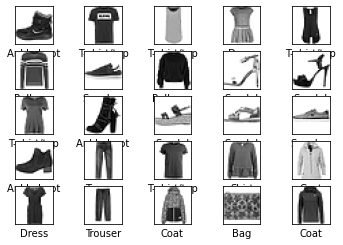

In [ ]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_7 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5132 - accuracy: 0.8109 - val_loss: 0.3819 - val_accuracy: 0.8654
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3405 - accuracy: 0.8753 - val_loss: 0.3221 - val_accuracy: 0.8813
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2948 - accuracy: 0.8914 - val_loss: 0.3281 - val_accuracy: 0.8845
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2703 - accuracy: 0.8992 - val_loss: 0.2823 - val_accuracy: 0.8967
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2502 - accuracy: 0.9069 - val_loss: 0.2673 - val_accuracy: 0.9007
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2364 - accuracy: 0.9113 - val_loss: 0.2776 - val_accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2207 - accuracy: 0.9168 - val_loss: 0.2757 -

313/313 - 2s - loss: 0.2514 - accuracy: 0.9074


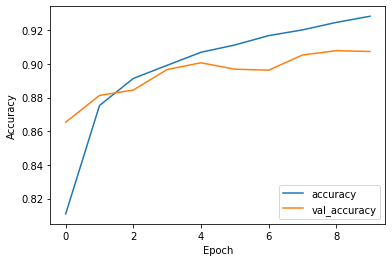

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9074000120162964


In [ ]:
model.save('final_model.h5')